# Data Visualization

In [35]:
import pandas as pd             
import numpy as np


from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor

#Feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [36]:
df=pd.read_csv('train.csv')
all_data=df.copy(deep=True)
all_data_na = (all_data.isnull().sum(axis=0) / len(all_data)) * 100
from datetime import date
import datetime

df['Day'] = df['DATE'].apply(lambda x: 
                      (date(datetime.datetime.strptime(x,"%Y-%m-%d").year,datetime.datetime.strptime(x,"%Y-%m-%d").month,
                      datetime.datetime.strptime(x,"%Y-%m-%d").day)-date(2019,4,10)).days)
df.drop(['DATE'],axis=1,inplace=True)

target_variable='aircon_sum_target_next14d'
input_variables=df.columns[df.columns!=target_variable]

input_data=df.loc[:,input_variables]
target_data=df.loc[:,target_variable]



In [37]:
input_data

SITE_ID  CELL_TYPE_Macro  ...  kurt_temperature_alarms_prev14d  Day
0           146                1  ...                        -1.212308    0
1           146                1  ...                        -1.212308    1
2           146                1  ...                        -1.212308    2
3           146                1  ...                        -1.212308    3
4           146                1  ...                        -1.212308    4
...         ...              ...  ...                              ...  ...
546285      896                1  ...                        -1.212308  285
546286      896                1  ...                        -1.212308  286
546287      896                1  ...                        -1.212308  287
546288      896                1  ...                        -1.212308  288
546289      896                1  ...                              NaN  289

[546290 rows x 135 columns]

In [ ]:
input_data.head()

SITE_ID  CELL_TYPE_Macro  CELL_TYPE_Mobil  CELL_TYPE_TRP  \
0      146                1                0              0   
1      146                1                0              0   
2      146                1                0              0   
3      146                1                0              0   
4      146                1                0              0   

   CELL_TYPE_Tx site  CELL_TYPE_micro  N_TRANSPORTED_SITES  \
0                  0                0                  3.0   
1                  0                0                  3.0   
2                  0                0                  3.0   
3                  0                0                  3.0   
4                  0                0                  3.0   

   GEOGRAPHIC_CLUSTER_K_0  GEOGRAPHIC_CLUSTER_K_1  GEOGRAPHIC_CLUSTER_K_2  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   ...  skew_fire/smoke_alarms_prev14d  skew_ge_alarms_prev14d  \
0  ...                             0.0                     0.0   
1  ...                             0.0                     0.0   
2  ...                             0.0                     0.0   
3  ...                             0.0                     0.0   
4  ...                             0.0                     0.0   

   skew_power_alarms_prev14d  skew_temperature_alarms_prev14d  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   

   kurt_equipment_alarms_prev14d  kurt_fire/smoke_alarms_prev14d  \
0                      -1.212308                       -1.212308   
1                      -1.212308                       -1.212308   
2                      -1.212308                       -1.212308   
3                      -1.212308                       -1.212308   
4                      -1.212308                       -1.212308   

   kurt_ge_alarms_prev14d  kurt_power_alarms_prev14d  \
0               -1.212308                  -1.212308   
1               -1.212308                  -1.212308   
2               -1.212308                  -1.212308   
3               -1.212308                  -1.212308   
4               -1.212308                  -1.212308   

   kurt_temperature_alarms_prev14d  Day  
0                        -1.212308    0  
1                        -1.212308    1  
2                        -1.212308    2  
3                        -1.212308    3  
4                        -1.212308    4  

[5 rows x 135 columns]

In [ ]:
input_data.describe(include='all')

SITE_ID  ...            Day
count  621300.000000  ...  621300.000000
mean     1315.745534  ...     149.500000
std       751.146117  ...      86.602129
min         0.000000  ...       0.000000
25%       663.000000  ...      74.750000
50%      1328.000000  ...     149.500000
75%      1965.000000  ...     224.250000
max      2604.000000  ...     299.000000

[8 rows x 135 columns]

In [ ]:
# categorical_variables_mask = input_data.dtypes==object
# categorical_variables = input_data.columns[categorical_variables_mask].tolist()
# print(categorical_variables)
# numerical_variables = input_data.columns[~categorical_variables_mask].tolist()
#numerical_variables.remove('NumberOfSales')
numerical_variables

In [38]:
site_IDs=df['SITE_ID']
Dates=df['Day']
N_Transported_Sites=df[ 'N_TRANSPORTED_SITES']
Cell_Type=df.loc[:, 'CELL_TYPE_Macro': 'CELL_TYPE_micro']
Geographical_Cluster=df.loc[:, 'GEOGRAPHIC_CLUSTER_K_0': 'GEOGRAPHIC_CLUSTER_K_9']
m3_w_prevXd=df.loc[ :, 'mean_temperature_prev7d':  'min_pressure_prev3d']
m3_w_f_nextXd=df.loc[:,'mean_temperature_f_next14d':'min_pressure_f_next7d']
aircon_sum=df.loc[:,'aircon_sum_wo_prev7d':'aircon_sum_wo_prev14d']
cat_sum_alarms_prevXd=df.loc[:,'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
cat_m3_persistance_prevXd=df.loc[:,'equipment_max_persistance_prev7d':'temperature_min_persistance_prev3d']
skew_cat_alarms_prev14d=df.loc[:,'skew_equipment_alarms_prev14d': 'skew_temperature_alarms_prev14d']
kurt_cat_alarms_prev14d=df.loc[:,'kurt_equipment_alarms_prev14d': 'kurt_temperature_alarms_prev14d']
target_data=df.loc[:,'aircon_sum_target_next14d']

In [ ]:
#df_row = pd.concat([df1, df2])
train_data=pd.concat([m3_w_prevXd,m3_w_f_nextXd,cat_sum_alarms_prevXd,cat_m3_persistance_prevXd], axis=1)
#np.shape(cat_m3_persistance_prevXd)
train_data

mean_temperature_prev7d  ...  temperature_min_persistance_prev3d
0                         10.29  ...                                 0.0
1                         11.71  ...                                 0.0
2                         11.57  ...                                 0.0
3                         11.29  ...                                 0.0
4                         10.57  ...                                 0.0
...                         ...  ...                                 ...
621295                     4.00  ...                                 0.0
621296                     4.29  ...                                 0.0
621297                     4.71  ...                                 0.0
621298                     5.57  ...                                 0.0
621299                     6.14  ...                                 0.0

[621300 rows x 105 columns]

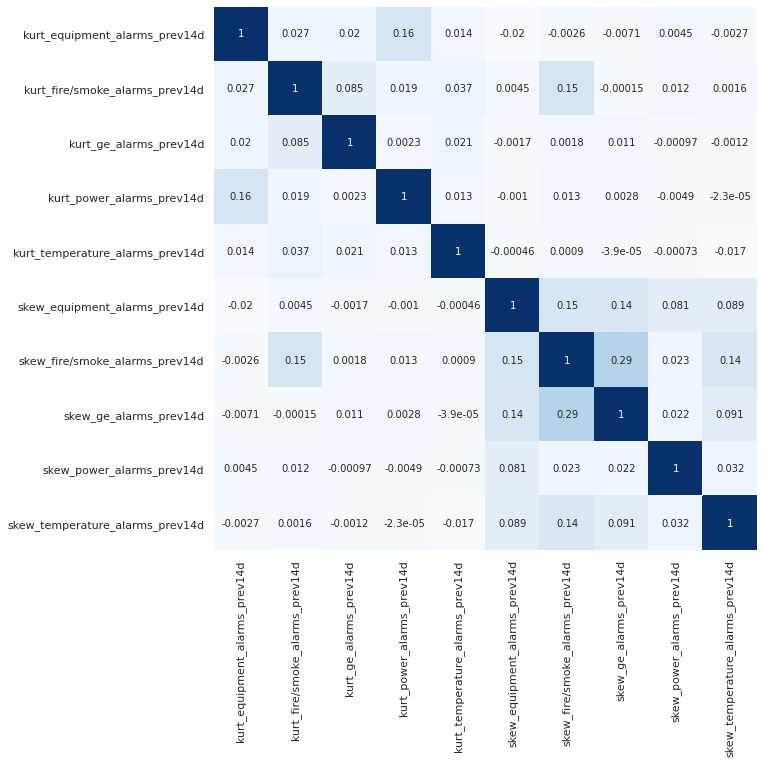

In [39]:
cov=pd.concat([kurt_cat_alarms_prev14d,skew_cat_alarms_prev14d],axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

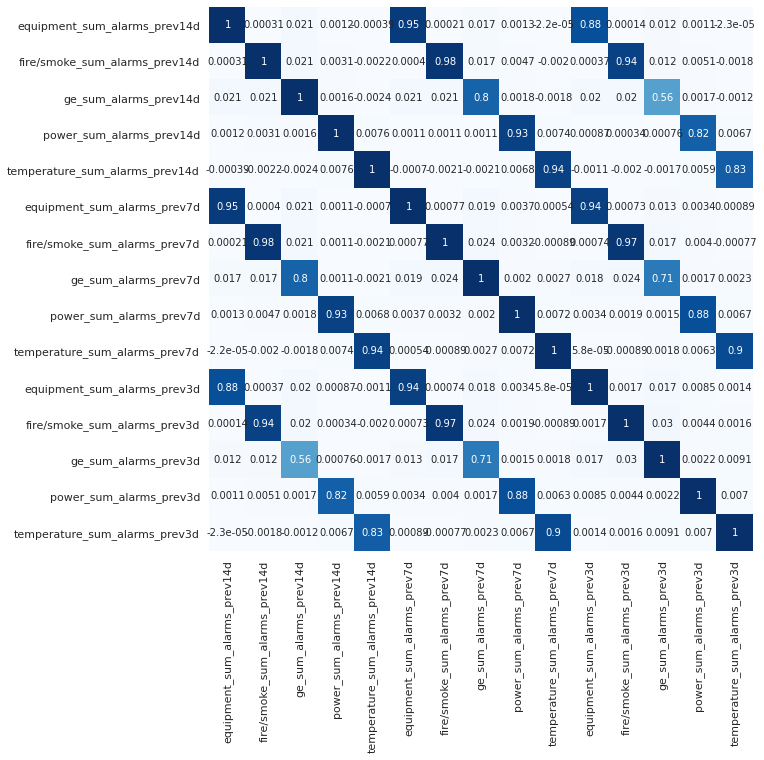

In [40]:
cov=pd.concat([cat_sum_alarms_prevXd], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

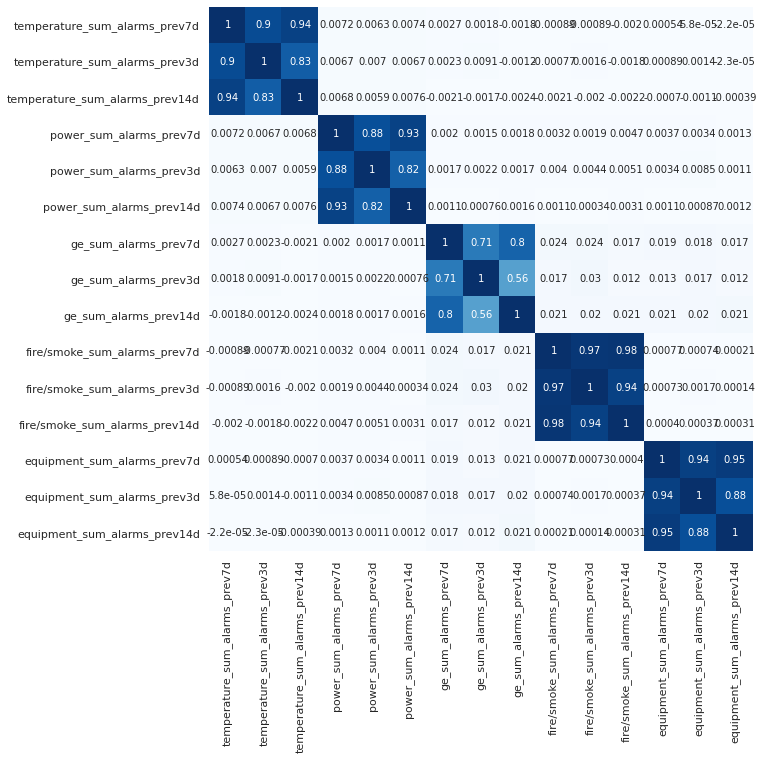

In [41]:
#Now we aggregate the alarm's correlated columns and plot the correlation again
sorted_alarm_df = df.loc[: , 'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
sorted_alarm_df = sorted_alarm_df.reindex(sorted(sorted_alarm_df.columns, reverse=True), axis=1)
cov=pd.concat([sorted_alarm_df], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [ ]:
#correlate sorted alarm with respect to the target value
# cov=sorted_alarm_df.corr(method='pearson')[target_data][:]
cov=pd.concat([sorted_alarm_df, target_data], axis=1).corr(method='pearson')

plt.figure(figsize = (10,10))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

 We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

In [48]:
#Correlation with output variable
cor_target = abs(cov["aircon_sum_target_next14d"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

aircon_sum_target_next14d    1.0
Name: aircon_sum_target_next14d, dtype: float64

In [ ]:
cov=pd.concat([cat_m3_persistance_prevXd], axis=1).corr(method='pearson')
plt.figure(figsize = (20,20))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

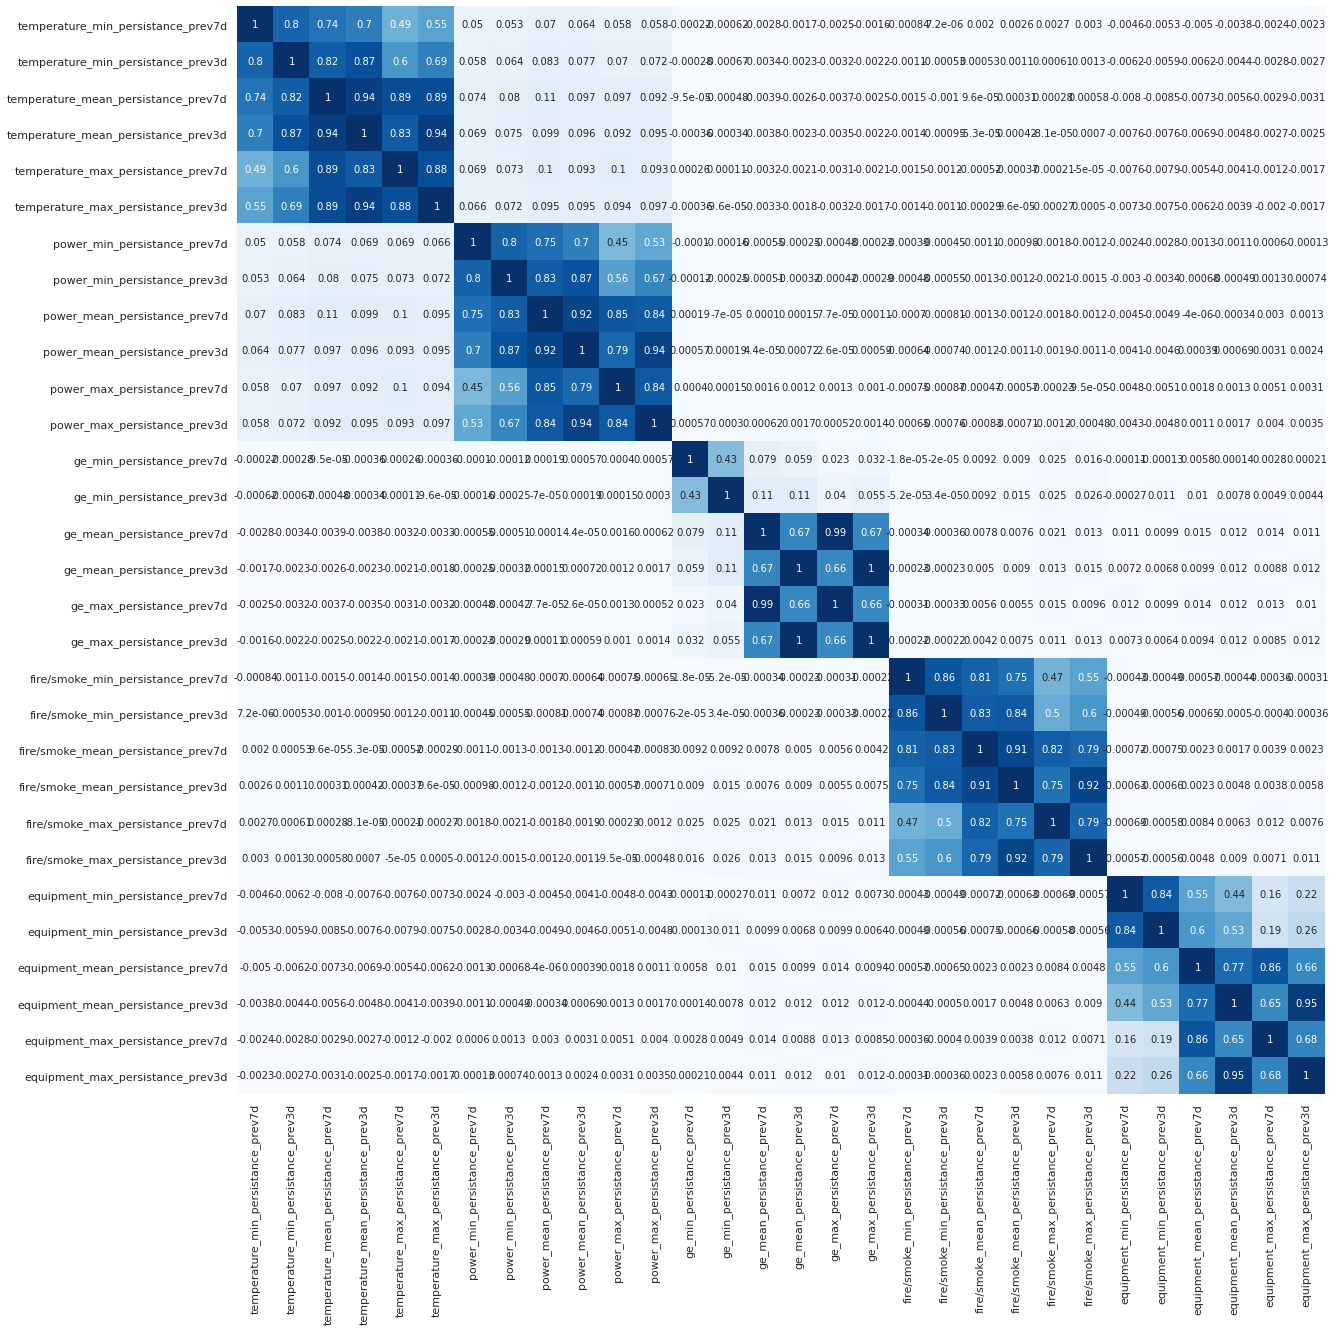

In [50]:
#Now we aggregate the persistance's correlated columns and plot the correlation again
sorted_persistance_df = (df.loc[:, 'equipment_max_persistance_prev7d': 'temperature_min_persistance_prev3d'])
sorted_persistance_df = sorted_persistance_df.reindex(sorted(sorted_persistance_df.columns, reverse=True), axis=1)
cov=pd.concat([sorted_persistance_df], axis=1).corr(method='pearson')
plt.figure(figsize = (20,20))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [ ]:
#correlate sorted alarm with respect to the target value
# cov=sorted_alarm_df.corr(method='pearson')[target_data][:]
cov=pd.concat([sorted_persistance_df, target_data], axis=1).corr(method='pearson')

plt.figure(figsize = (20,20))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

 We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

In [53]:
#Correlation with output variable
cor_target = abs(cov["aircon_sum_target_next14d"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

aircon_sum_target_next14d    1.0
Name: aircon_sum_target_next14d, dtype: float64

## Numerical Value

In [ ]:
cov=pd.concat([m3_w_prevXd,m3_w_f_nextXd], axis=1).corr(method='pearson')
plt.figure(figsize = (24,24))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [54]:
# sort Numerical values
def sorted_m3_numerical_values(numerical_df):
  sorted_Numerical_df = numerical_df.reindex(sorted(numerical_df.columns, reverse=True), axis=1)
  sorted_Numerical_columns_list = (list(sorted_Numerical_df.columns))
  New_Numerical_columns_list = []
  for column in sorted_Numerical_columns_list:
    New_column = column.replace('_',' ')
    New_Numerical_columns_list.append(New_column)

  New_Numerical_columns_list.sort(key=lambda s: s.split()[1])

  sorted_Numerical_columns_list.clear()
  for column in New_Numerical_columns_list:
    New_column = column.replace(' ','_')
    sorted_Numerical_columns_list.append(New_column)
  
  #drop the dataframe
  sorted_Numerical_df = sorted_Numerical_df.iloc[0:0]
  
  sorted_Numerical_df = numerical_df[sorted_Numerical_columns_list]
  return sorted_Numerical_df


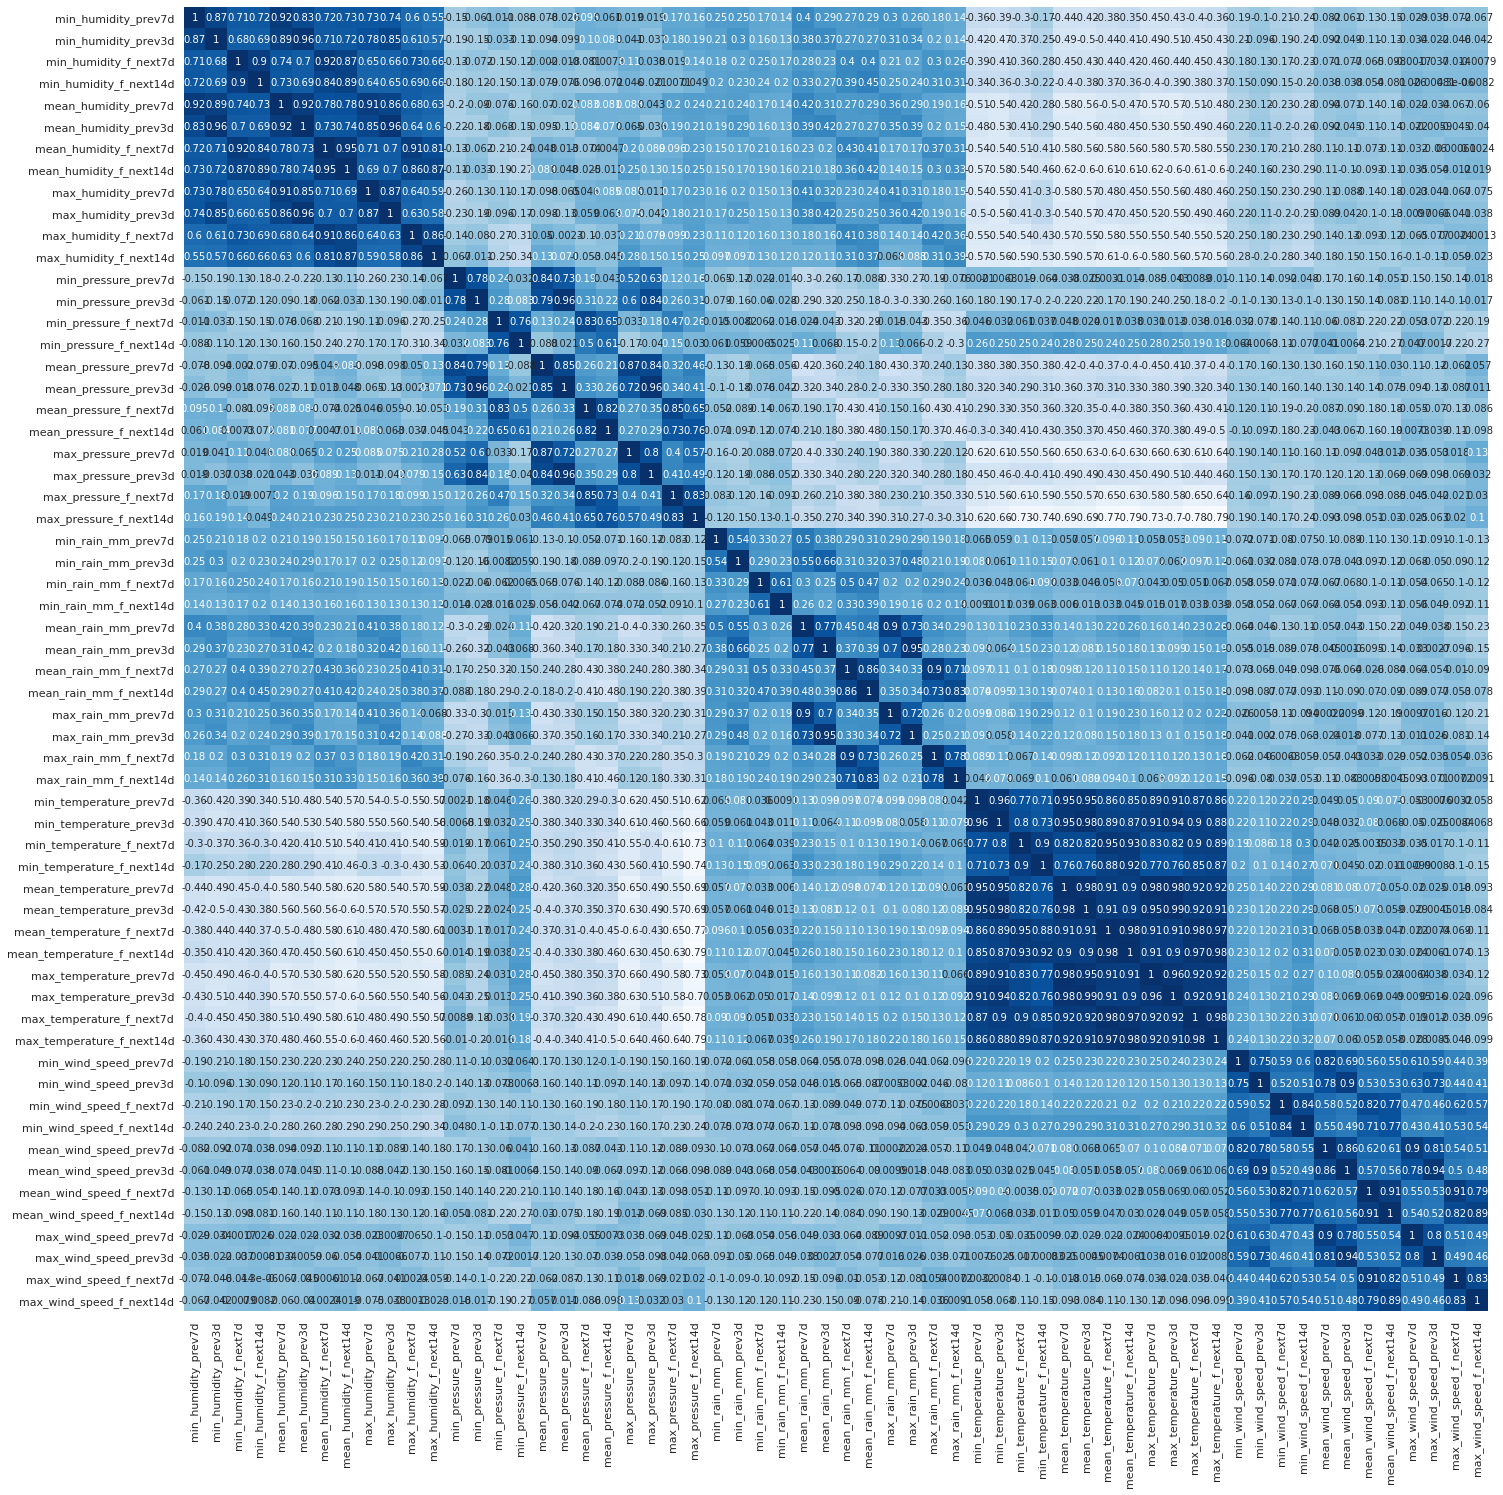

In [55]:
#Now we aggregate the Numerical's correlated columns and plot the correlation again
Numerical_df = df.loc[: , 'mean_temperature_prev7d':'min_pressure_f_next7d']
sorted_Numerical_df = sorted_m3_numerical_values(Numerical_df)
cov=pd.concat([sorted_Numerical_df], axis=1).corr(method='pearson')
plt.figure(figsize = (24,24))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)


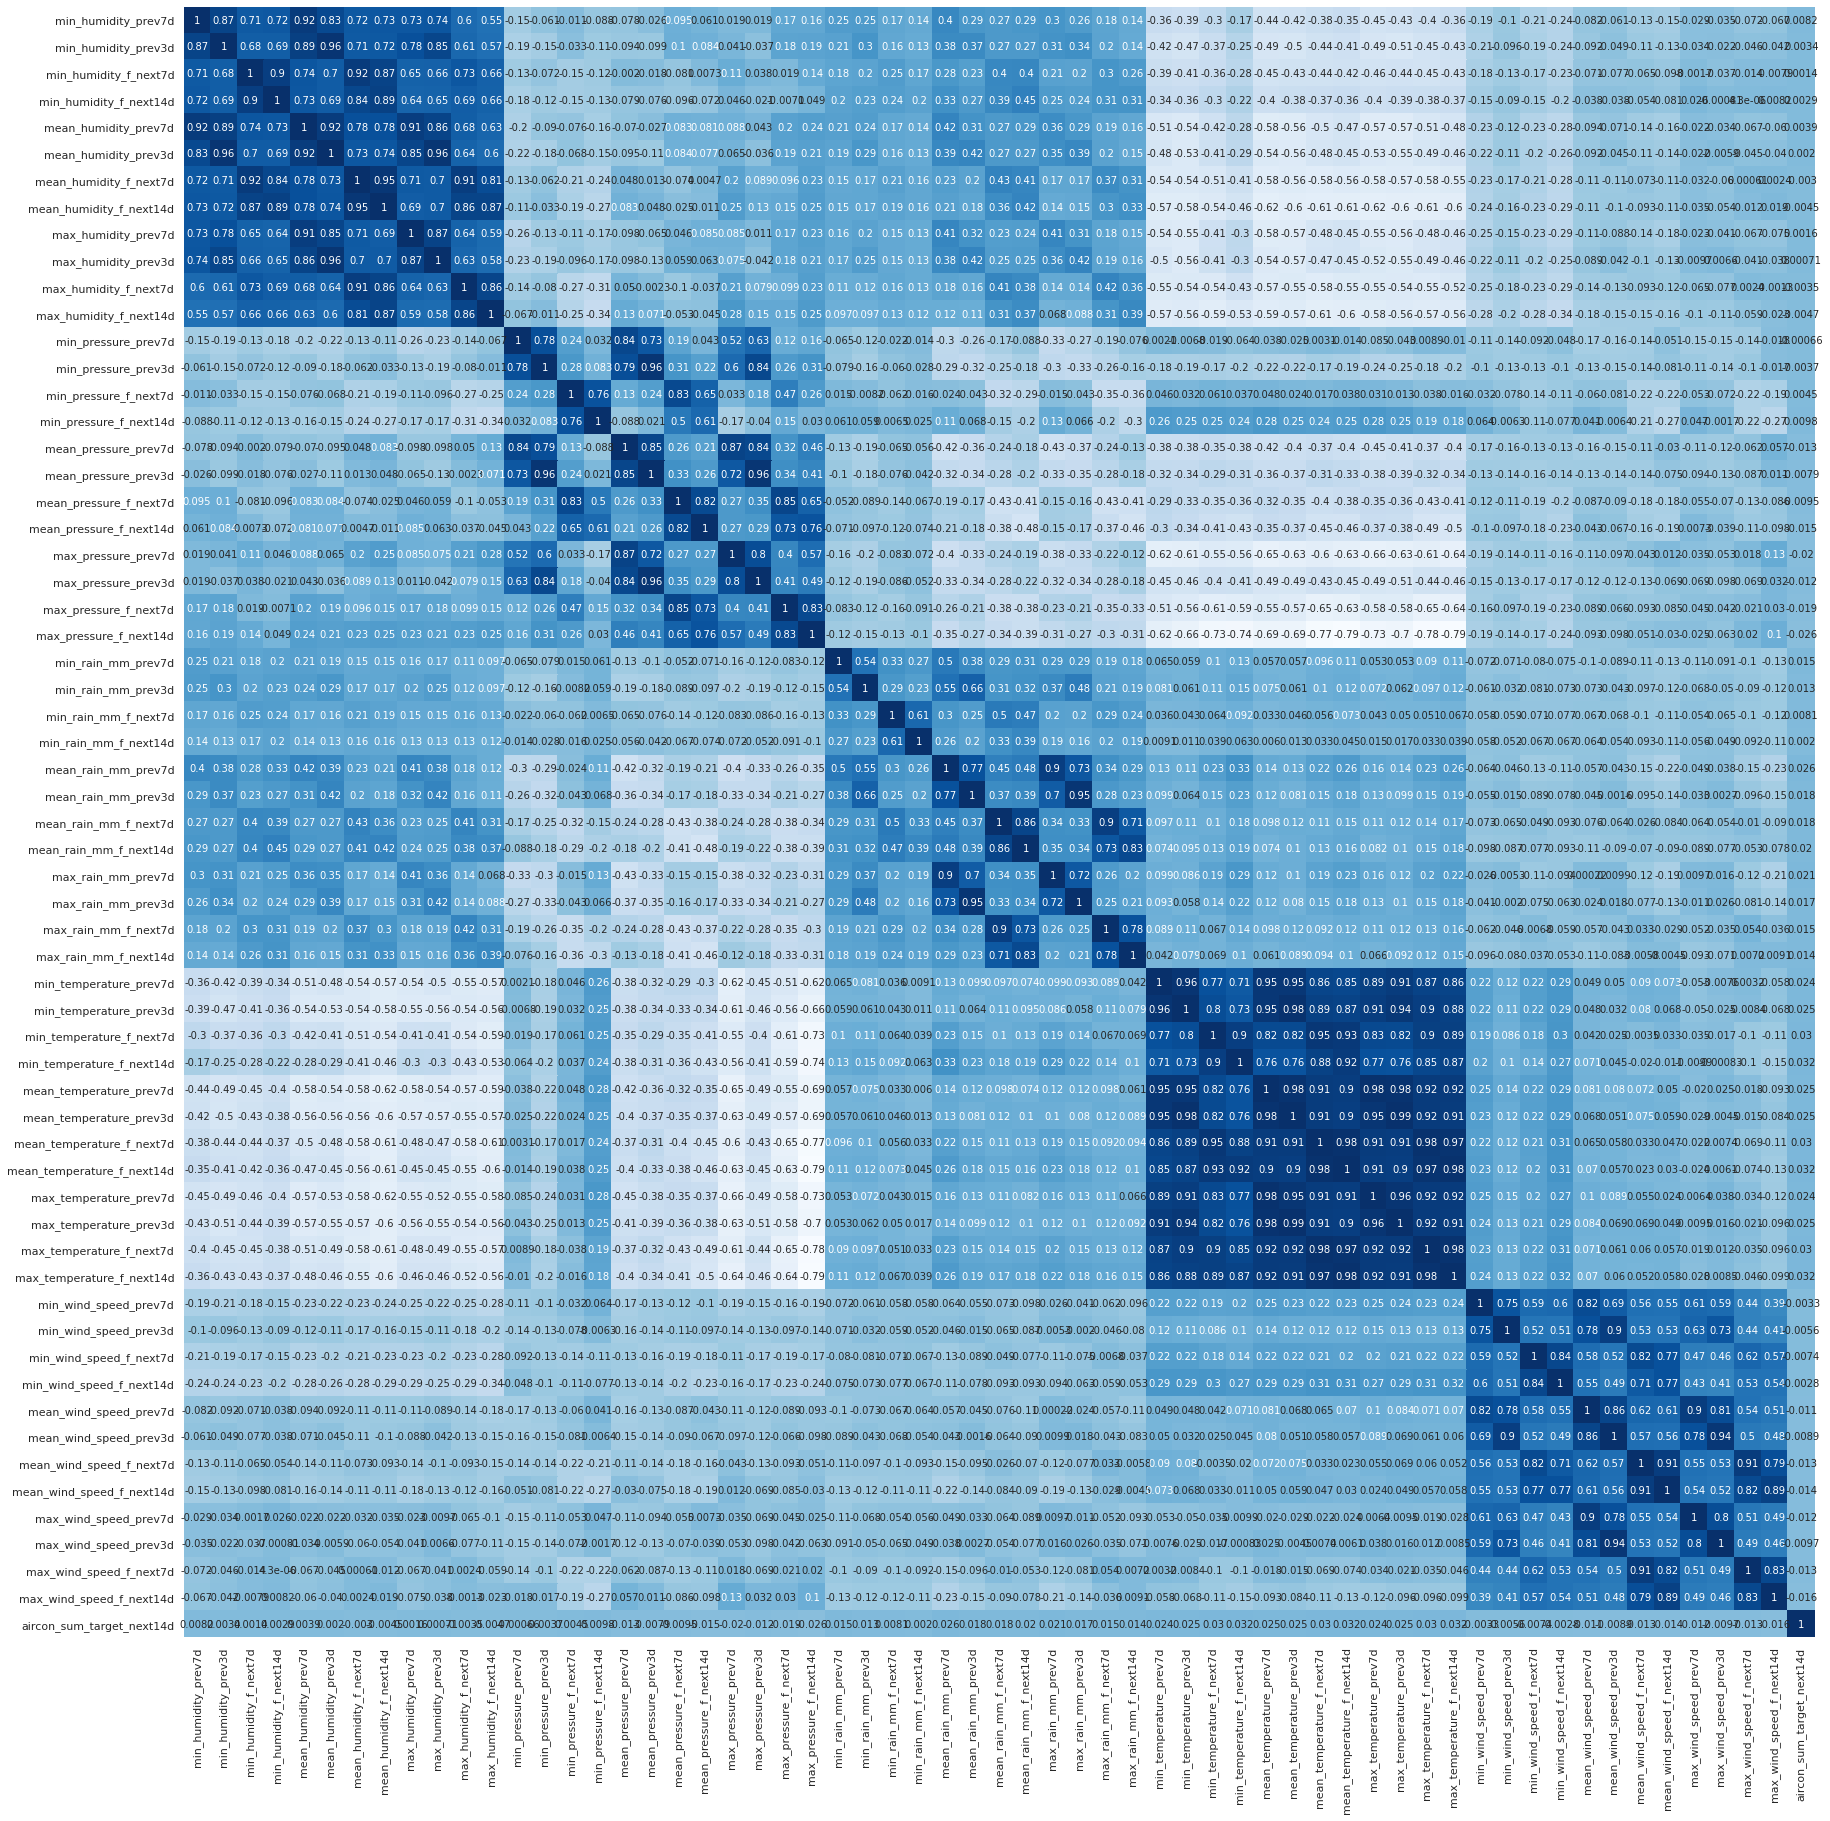

In [60]:
#correlate sorted alarm with respect to the target value
# cov=sorted_alarm_df.corr(method='pearson')[target_data][:]
cov=pd.concat([sorted_Numerical_df, target_data], axis=1).corr(method='pearson')

plt.figure(figsize = (30,30))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

 We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

In [59]:
#Correlation with output variable
cor_target = abs(cov["aircon_sum_target_next14d"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

aircon_sum_target_next14d    1.0
Name: aircon_sum_target_next14d, dtype: float64

# Feature Extraction
 In this part we are doing FE only for Numerical dataset

Since we are using regression approaches that are sensitive to the variable range, we need to normalized the input variables.

In [32]:
scaler = StandardScaler()
data = pd.concat([sorted_Numerical_df, target_data])
X = sorted_Numerical_df
y = target_data
Xs = scaler.fit_transform(X)

dfs = pd.DataFrame(Xs, columns=sorted_Numerical_df.columns)
dfs['aircon_sum_target_next14d'] = y
dfs.head()

min_humidity_prev7d  ...  aircon_sum_target_next14d
0            -0.769629  ...                          0
1            -0.273400  ...                          0
2             0.305534  ...                          0
3             0.305534  ...                          0
4             0.305534  ...                          0

[5 rows x 61 columns]

In [33]:
data.shape

(578892, 61)

## Reduced Variance Feature Selection
This feature selection algorithm computes the variance of all the variables and eliminates the variables with a variance below a certain threshold. The rationale is that, if the variance is very low, the values of the feature are very similar to each other so we may eliminate the variable. 

In the example below, the threshold is set as the variance of a Bernoulli distribution of a given probability (0.8 in this example).

In [ ]:
feature_selection_variance_model = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_selected_features_variance = feature_selection_variance_model.fit_transform(X)


mask = feature_selection_variance_model.get_support() #list of booleans
mask

In [62]:
feature_selection_variance_model = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_selected_features_variance = feature_selection_variance_model.fit_transform(X)


mask = feature_selection_variance_model.get_support() #list of booleans
print("Reduced data set shape = ", X_selected_features_variance.shape)
print("     Selected features = ", data.columns[mask])
print("      Deleted Features = ", data.columns[~mask])

Reduced data set shape =  (289446, 57)


IndexError: ignored

Text(0.5, 1.0, 'Variable NOX')

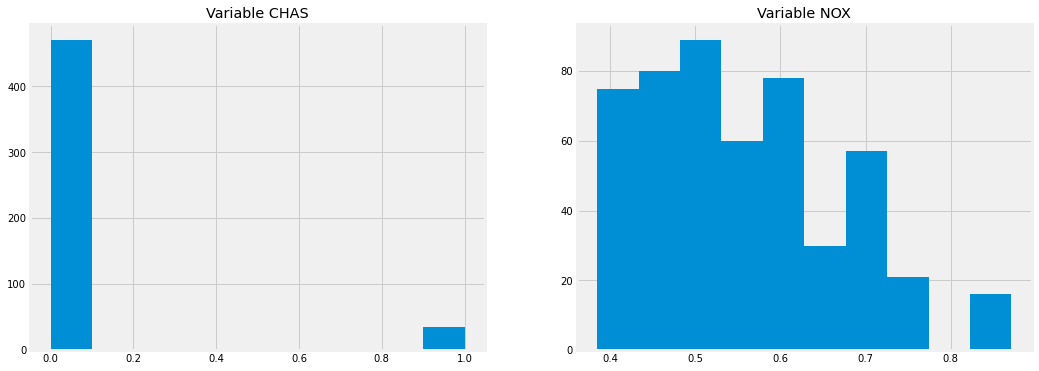

In [ ]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
plt.hist(df['CHAS'],label='CHAS')
plt.title("Variable CHAS")

plt.subplot(1,2,2)
plt.hist(df['NOX'],label='NOX')
plt.title("Variable NOX")

In [ ]:
variance_model = LinearRegression()
variance_scores = cross_val_score(variance_model, X[:,mask], y, cv=kfolds)
print("Variance Model R2 Mean %.3f StdDev %.3f"%(variance_scores.mean(),variance_scores.std()))

Variance Model R2 Mean 0.664 StdDev 0.140


# Variables Analysis

value counts
2047    300
680     300
672     300
2208    300
161     300
       ... 
340     300
852     300
1364    300
1876    300
0       300
Name: SITE_ID, Length: 2071, dtype: int64
Null Values:  False


<AxesSubplot:>

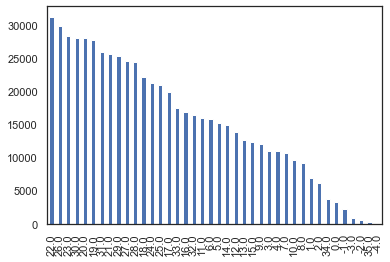

In [ ]:
#StoreType: 4 types
print('value counts')
print(input_data['SITE_ID'].value_counts())
print("Null Values: ",input_data['SITE_ID'].isnull().any())
input_data['max_temperature_prev7d'].value_counts().plot.bar()

In [ ]:
np.min(input_data['SITE_ID'].value_counts())

300

In [ ]:
#AssortmentType
print(train_data['AssortmentType'].value_counts())
print("Null Values: ",train_data['AssortmentType'].isnull().any())
train_data['AssortmentType'].value_counts().plot.bar()

KeyError: 'AssortmentType'

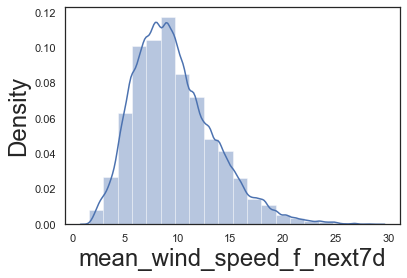

In [ ]:
#NearestCompetitor
hist1 = sns.distplot(train_data['mean_wind_speed_f_next7d'],bins=20)

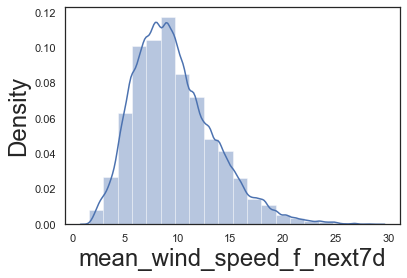

In [ ]:
hist2 = sns.distplot(train_data[train_data['mean_wind_speed_f_next7d']<20000]['mean_wind_speed_f_next7d'],bins=20)